In [31]:
if 'libraries_imported' not in globals():
    libraries_imported = False

if libraries_imported == False:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os
    from datetime import datetime, timedelta
    from datetime import datetime
    from scipy.interpolate import make_interp_spline
    import plotly.graph_objects as go
    from scipy.signal import butter, filtfilt
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import StandardScaler
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    from keras_tuner import RandomSearch, HyperModel
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import StandardScaler
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense
    from tensorflow.keras.callbacks import EarlyStopping
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    from keras_tuner import RandomSearch, HyperModel
    from tensorflow.keras.layers import Input
    import sys
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor
    import numpy as np
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import RobustScaler
    import tensorflow as tf
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    from sklearn.preprocessing import RobustScaler
    import joblib
    from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
    from sklearn.utils.class_weight import compute_class_weight
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import joblib
    import tensorflow as tf
    from sklearn.preprocessing import RobustScaler
    from sklearn.model_selection import train_test_split
    from sklearn.utils.class_weight import compute_class_weight
    from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
    import numpy as np
    import pandas as pd
    import joblib
    import tensorflow as tf
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import SMOTE




    # # Display the first few rows
    # import ace_tools as tools  # Importing display tool

In [32]:

# Load and clean SaniWASE dataset
saniWASE_df = pd.read_csv("datasets/SaniWASE_Data_Cleaned_t1.csv")
saniWASE_df["date"] = pd.to_datetime(saniWASE_df["datetime"])
saniWASE_df.drop(columns=["index", "datetime", "f/m_ratio", "fos", "tac"], inplace=True)
saniWASE_df = saniWASE_df.drop_duplicates()
# Load and clean Cook dataset
cook_df = pd.read_csv("datasets/Cook_Data_Cleaned_t1.csv")
cook_df['date'] = pd.to_datetime(cook_df['date'])
cook_df = cook_df.groupby('date').mean()
cook_df = cook_df.drop_duplicates()
cook_df.reset_index(inplace=True)





cook_df.drop(columns=["Unnamed: 0"], inplace=True)
cook_df["methane_percentage"] *= 100

# Ensure consistent column order, keeping "date" first
column_order = ["date"] + [col for col in saniWASE_df.columns if col != "date"]
saniWASE_df = saniWASE_df[column_order]
cook_df = cook_df[column_order]




#Only keep live data inputs 

saniWASE_df.drop(columns=["h2s_ppm", "t1_cod", "t1_olr", "eq_cod"], inplace=True)
cook_df.drop(columns=["h2s_ppm", "t1_cod", "t1_olr", "eq_cod"], inplace=True)


display(saniWASE_df.head())
display(cook_df.head())


saniWASE_df_interpolated = saniWASE_df.interpolate(method = 'ffill')
cook_df_interpolated = cook_df.interpolate(method = 'ffill')
# cook_df_interpolated = cook_df.dropna()


/tmp/ipykernel_28802/1451004262.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  saniWASE_df["date"] = pd.to_datetime(saniWASE_df["datetime"])


,date,eq_ph,feed_vol,t1_ph,current,temp,methane_percentage,hrt,biogas_vol,fostac
0,2022-07-06,5.5,144,7.1,1652,36.8,65.1,25.0,1232.0,0.53
1,2022-08-06,5.3,144,7.2,1652,36.8,68.0,25.0,1019.0,0.34
2,2022-09-06,5.2,144,7.3,1652,36.8,70.9,25.0,1005.0,0.15
3,2022-10-06,5.2,192,7.3,1652,34.8,65.7,19.0,892.0,0.19
4,2022-11-06,NaN,192,NaN,1652,NaN,65.7,19.0,1100.0,NaN


,date,eq_ph,feed_vol,t1_ph,current,temp,methane_percentage,hrt,biogas_vol,fostac
0,2024-11-04,3.7,60.0,7.0,497.422,35.770769,66.66,15.0,300.0,0.14
1,2024-11-05,3.7,60.0,7.0,545.210,36.464368,62.71,15.0,690.0,0.16
2,2024-11-06,3.7,60.0,7.0,519.733,36.996667,64.16,15.0,660.0,0.15
3,2024-11-07,3.6,60.0,7.0,506.521,35.317529,61.32,15.0,770.0,0.16
4,2024-11-08,3.7,60.0,7.0,484.783,35.906047,60.61,15.0,740.0,0.16


/tmp/ipykernel_28802/1451004262.py:38: FutureWarning: DataFrame.interpolate with method=ffill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  saniWASE_df_interpolated = saniWASE_df.interpolate(method = 'ffill')
/tmp/ipykernel_28802/1451004262.py:39: FutureWarning: DataFrame.interpolate with method=ffill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cook_df_interpolated = cook_df.interpolate(method = 'ffill')


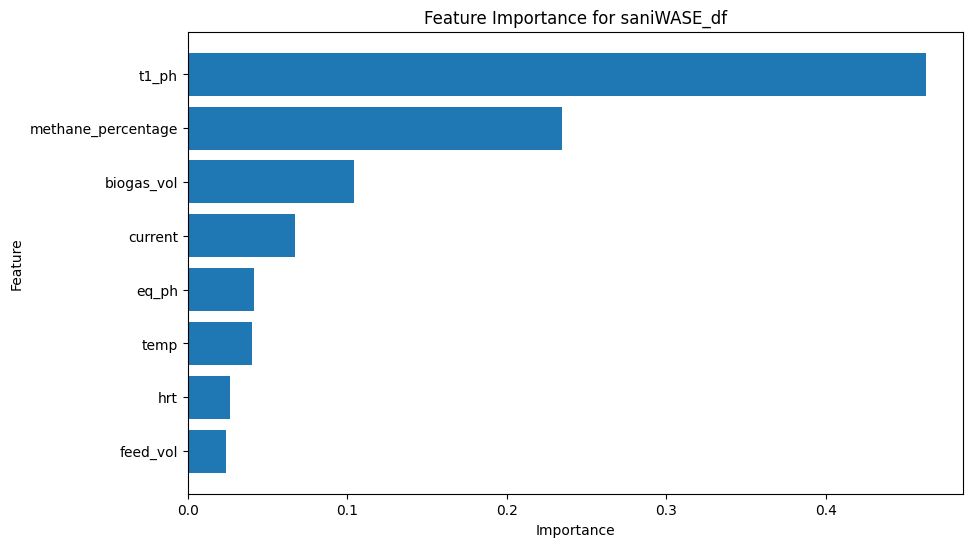

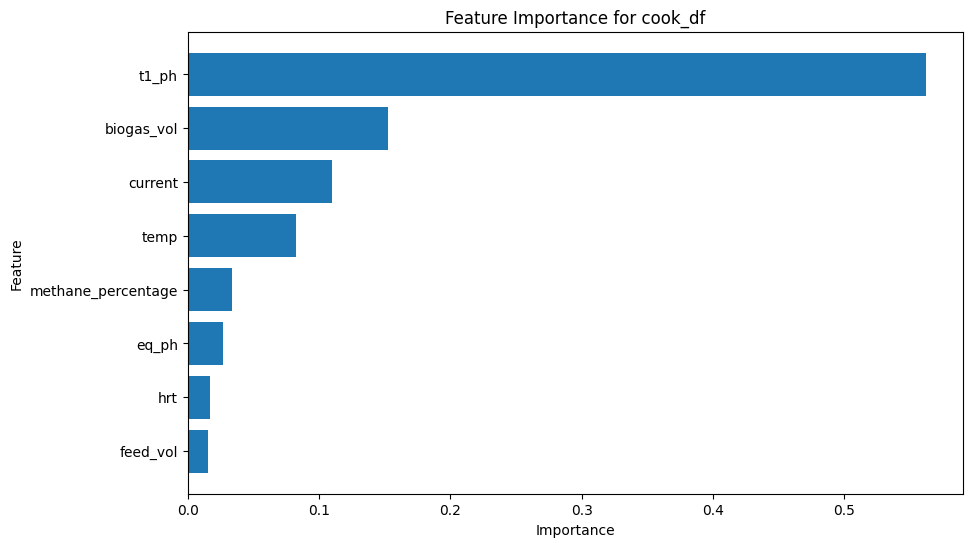

In [33]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Function to perform feature importance analysis
def feature_importance_analysis(df, target_column, drop_columns, title):
    # Prepare the data
    X = df.drop(drop_columns, axis=1)
    y = df[target_column]

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Modeling
    model = RandomForestRegressor(n_estimators=300, random_state=42)
    model.fit(X_train, y_train)

    # Feature importance extraction
    importances = model.feature_importances_
    features = X_train.columns

    # Sorting the features by importance
    indices = np.argsort(importances)
    sorted_features = [features[i] for i in indices]
    sorted_importances = importances[indices]

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_features, sorted_importances)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(title)
    plt.show()

# Feature importance for saniWASE_df
feature_importance_analysis(
    df= saniWASE_df_interpolated,
    target_column='fostac',
    drop_columns=['fostac', 'date'],
    title='Feature Importance for saniWASE_df'
)

# Feature importance for cook_df
feature_importance_analysis(
    df= cook_df_interpolated,
    target_column='fostac',
    drop_columns=['fostac', 'date'],
    title='Feature Importance for cook_df'
)



# Feature Importance Comparison

## Common Observations
- **`t1_ph`** is the most significant feature in both datasets (importance > 0.4).
- **`biogas_vol`** consistently ranks among the top three features.

## Notable Differences

| Feature               | saniWASE_df Importance | cook_df Importance |
|-----------------------|------------------------|--------------------|
| **`methane_percentage`** | High (2nd)             | Low (6th)          |
| **`eq_ph`**              | Moderate (5th)         | High (2nd)         |
| **`feed_vol`**           | Low (8th)              | Moderate (4th)     |
| **`current`**            | Moderate (4th)         | Low (5th)          |
| **`temp`**               | Low (slightly higher)  | Very Low           |
| **`hrt`**                | Consistently low       | Lowest             |

## Overall Insights
- **`t1_ph`** consistently emerges as the most influential predictor, indicating pH's critical role across both scenarios.
- Secondary feature importance highlights dataset-specific dynamics:
  - **saniWASE_df** outcomes depend significantly on methane percentage and biogas volume.
  - **cook_df** outcomes rely heavily on equilibrium pH (`eq_ph`) and biogas volume.


In [34]:
scaler = joblib.load('ANN_hyperparams/robust_scaler.pkl')
df_interpolated  = cook_df_interpolated[['fostac', 'date', 't1_ph', 'biogas_vol', 'methane_percentage', 'current', 'temp']]

In [35]:
print(df_interpolated.info)

<bound method DataFrame.info of     fostac       date  t1_ph  biogas_vol  methane_percentage  current  \
0     0.14 2024-11-04    7.0       300.0              66.660  497.422   
1     0.16 2024-11-05    7.0       690.0              62.710  545.210   
2     0.15 2024-11-06    7.0       660.0              64.160  519.733   
3     0.16 2024-11-07    7.0       770.0              61.320  506.521   
4     0.16 2024-11-08    7.0       740.0              60.610  484.783   
5     0.16 2024-11-11    6.9       760.0              59.100  440.825   
6     0.18 2024-11-12    6.9      1130.0              57.760  469.710   
7     0.17 2024-11-14    6.9      1130.0              58.300  442.490   
8     0.16 2024-11-15    6.9      1060.0              60.351  439.181   
9     0.13 2024-11-16    7.0      1070.0              60.640  437.033   
10    0.12 2024-11-19    6.9      1000.0              62.020  430.155   
11    0.16 2024-11-21    6.9      1160.0              61.070  365.637   
12    0.15 2024-11-

In [36]:
import numpy as np
import pandas as pd
import joblib
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

# Number of attempts
n_attempts = 10
initial_seed = 42

# Containers to store results across attempts
results_summary = []

# Load scaler and model template
scaler = joblib.load('ANN_hyperparams/robust_scaler.pkl')
model_template = tf.keras.models.load_model('ANN_hyperparams/best_deeper_classification_model.keras')

# Data preparation
df = df_interpolated.copy()
target = 'fostac'
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.dropna(subset=[target], inplace=True)

bins = [0, 0.3, 0.6, 2.0]
labels = [0, 1, 2]
df['fostac_category'] = pd.cut(df[target], bins=bins, labels=labels, include_lowest=True)
df.dropna(subset=['fostac_category'], inplace=True)
df['fostac_category'] = df['fostac_category'].astype(int)

X = df.drop(columns=[target, 'fostac_category'])
y = df['fostac_category']

# Load scaler
scaler = joblib.load('ANN_hyperparams/robust_scaler.pkl')

results_summary = []

for attempt in range(n_attempts):
    print(f'\nAttempt {attempt + 1}/{n_attempts}')
    seed = initial_seed + attempt
    np.random.seed(seed)
    tf.random.set_seed(seed)

    # Stratified train-test split (recommended)
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.3, random_state=seed, shuffle=True, stratify=y
    )

    X_train_scaled = scaler.transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # SMOTE for balancing
    smote = SMOTE(random_state=seed, k_neighbors=1)
    X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

    # Clone fresh model per attempt
    model = tf.keras.models.load_model('ANN_hyperparams/best_deeper_classification_model.keras')
    model = tf.keras.models.clone_model(model)
    
    # Enable full fine-tuning
    # Freeze all layers except the last two
    for layer in model.layers[:-2]:  
        layer.trainable = False  # Keep earlier layers frozen

    # Enable training for the last two layers
    for layer in model.layers[-2:]:
        layer.trainable = True  # Only fine-tune the last two layers

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train
    history = model.fit(
    X_train_smote, y_train_smote,
    epochs=100,
    validation_data=(X_val_scaled, y_val),
    batch_size=16,  # Increased batch size for better stability
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_f1_macro',
            mode='max',
            patience=5,  # Reduced patience to prevent overfitting
            restore_best_weights=True
        )
    ],
    verbose=1  # Added verbosity for better logging
)

    # Evaluation metrics
    y_pred = np.argmax(model.predict(X_val_scaled), axis=1)
    report = classification_report(y_val, y_pred, output_dict=True, zero_division=0)
    
    accuracy = report['accuracy']
    precision_macro = report['macro avg']['precision']
    recall_macro = report['macro avg']['recall']
    f1_macro = report['macro avg']['f1-score']

    results_summary.append({
        'Attempt': attempt + 1,
        'Seed': seed,
        'Accuracy': accuracy,
        'Precision (Macro)': precision_macro,
        'Recall (Macro)': recall_macro,
        'F1-score (Macro)': f1_macro,
        'Class distribution': Counter(y_val),
    })

# Summarize results
results_df = pd.DataFrame(results_summary)

# Display summary table
print("\nPerformance Summary Across Attempts:\n")
print(results_df[['Attempt', 'Seed', 'Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1-score (Macro)']])

# Optionally save results summary
results_df.to_csv('ANN_hyperparams/multiple_attempts_summary.csv', index=False)



Attempt 1/10
Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.3134 - loss: 1.1964 - val_accuracy: 0.8667 - val_loss: 0.8972
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3040 - loss: 1.1923 - val_accuracy: 0.8667 - val_loss: 0.8983
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2968 - loss: 1.1786 - val_accuracy: 0.8667 - val_loss: 0.8994
Epoch 4/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1875 - loss: 1.2292

/home/harvey/.local/lib/python3.11/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_f1_macro` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2943 - loss: 1.1871 - val_accuracy: 0.8667 - val_loss: 0.9005
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3089 - loss: 1.1889 - val_accuracy: 0.8667 - val_loss: 0.9017
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3089 - loss: 1.1777 - val_accuracy: 0.8667 - val_loss: 0.9028
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3089 - loss: 1.1903 - val_accuracy: 0.8667 - val_loss: 0.9039
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3089 - loss: 1.1953 - val_accuracy: 0.8667 - val_loss: 0.9051
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2893 - loss: 1.1865 - val_accuracy: 0.8667 - val_loss: 0.9062
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3089 - loss: 1.1728 - val_accuracy: 0.8667 - val_loss: 0.9073
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3089 - loss: 1.1746 - val_accuracy: 0.8667 - val_loss: 0.9083
Ep

/home/harvey/.local/lib/python3.11/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_f1_macro` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3354 - loss: 1.0744 - val_accuracy: 0.8667 - val_loss: 0.8435
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3354 - loss: 1.0826 - val_accuracy: 0.8667 - val_loss: 0.8443
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3354 - loss: 1.0635 - val_accuracy: 0.8667 - val_loss: 0.8452
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3354 - loss: 1.0718 - val_accuracy: 0.8667 - val_loss: 0.8461
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3354 - loss: 1.0798 - val_accuracy: 0.8667 - val_loss: 0.8469
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3354 - loss: 1.0720 - val_accuracy: 0.8667 - val_loss: 0.8478
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3354 - loss: 1.0687 - val_accuracy: 0.8667 - val_loss: 0.8487
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3354 - loss: 1.0678 - val_accuracy: 0.8667 - val_loss: 0.8495
Ep

/home/harvey/.local/lib/python3.11/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_f1_macro` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2065 - loss: 1.2490 - val_accuracy: 0.5333 - val_loss: 0.9484
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1629 - loss: 1.2621 - val_accuracy: 0.5333 - val_loss: 0.9493
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2246 - loss: 1.2429 - val_accuracy: 0.5333 - val_loss: 0.9501
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2660 - loss: 1.2608 - val_accuracy: 0.4667 - val_loss: 0.9509
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1511 - loss: 1.2459 - val_accuracy: 0.4667 - val_loss: 0.9517
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1951 - loss: 1.2575 - val_accuracy: 0.4667 - val_loss: 0.9525
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2020 - loss: 1.2478 - val_accuracy: 0.4667 - val_loss: 0.9533
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2058 - loss: 1.2428 - val_accuracy: 0.4667 - val_loss: 0.9541
Ep

/home/harvey/.local/lib/python3.11/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_f1_macro` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2949 - loss: 1.1399 - val_accuracy: 0.8667 - val_loss: 0.9445
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2766 - loss: 1.1338 - val_accuracy: 0.8667 - val_loss: 0.9449
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2713 - loss: 1.1471 - val_accuracy: 0.8667 - val_loss: 0.9452
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2979 - loss: 1.1249 - val_accuracy: 0.8667 - val_loss: 0.9456
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2917 - loss: 1.1349 - val_accuracy: 0.8667 - val_loss: 0.9460
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2979 - loss: 1.1253 - val_accuracy: 0.8667 - val_loss: 0.9463
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2949 - loss: 1.1259 - val_accuracy: 0.8667 - val_loss: 0.9467
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2979 - loss: 1.1305 - val_accuracy: 0.8667 - val_loss: 0.9470
Ep

/home/harvey/.local/lib/python3.11/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_f1_macro` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2854 - loss: 1.2319 - val_accuracy: 0.8667 - val_loss: 0.9038
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2878 - loss: 1.2313 - val_accuracy: 0.8667 - val_loss: 0.9048
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2923 - loss: 1.2404 - val_accuracy: 0.8667 - val_loss: 0.9059
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3133 - loss: 1.2434 - val_accuracy: 0.8667 - val_loss: 0.9068
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2994 - loss: 1.2061 - val_accuracy: 0.8667 - val_loss: 0.9078
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2509 - loss: 1.2226 - val_accuracy: 0.8667 - val_loss: 0.9087
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3282 - loss: 1.2257 - val_accuracy: 0.8667 - val_loss: 0.9097
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3175 - loss: 1.2253 - val_accuracy: 0.8667 - val_loss: 0.9107
Ep

/home/harvey/.local/lib/python3.11/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_f1_macro` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2921 - loss: 1.1392 - val_accuracy: 0.0667 - val_loss: 1.1512
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3084 - loss: 1.1391 - val_accuracy: 0.0667 - val_loss: 1.1506
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3538 - loss: 1.1188 - val_accuracy: 0.0667 - val_loss: 1.1500
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3375 - loss: 1.1175 - val_accuracy: 0.0667 - val_loss: 1.1494
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3179 - loss: 1.1474 - val_accuracy: 0.0667 - val_loss: 1.1488
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3084 - loss: 1.1328 - val_accuracy: 0.0667 - val_loss: 1.1482
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3280 - loss: 1.1350 - val_accuracy: 0.0667 - val_loss: 1.1476
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3022 - loss: 1.1288 - val_accuracy: 0.0667 - val_loss: 1.1470
Ep

/home/harvey/.local/lib/python3.11/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_f1_macro` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3589 - loss: 1.1002 - val_accuracy: 0.8667 - val_loss: 0.9476
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4185 - loss: 1.0884 - val_accuracy: 0.8667 - val_loss: 0.9484
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3351 - loss: 1.1117 - val_accuracy: 0.8667 - val_loss: 0.9492
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3353 - loss: 1.0956 - val_accuracy: 0.8667 - val_loss: 0.9499
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3932 - loss: 1.1066 - val_accuracy: 0.8667 - val_loss: 0.9506
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3816 - loss: 1.0965 - val_accuracy: 0.8667 - val_loss: 0.9514
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4388 - loss: 1.0957 - val_accuracy: 0.8667 - val_loss: 0.9521
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3473 - loss: 1.1029 - val_accuracy: 0.8667 - val_loss: 0.9528
Ep

/home/harvey/.local/lib/python3.11/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_f1_macro` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3585 - loss: 1.2622 - val_accuracy: 0.8000 - val_loss: 0.8245
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3510 - loss: 1.3015 - val_accuracy: 0.8000 - val_loss: 0.8266
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3369 - loss: 1.2528 - val_accuracy: 0.8000 - val_loss: 0.8288
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3484 - loss: 1.2785 - val_accuracy: 0.8000 - val_loss: 0.8309
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3369 - loss: 1.2768 - val_accuracy: 0.8000 - val_loss: 0.8331
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3585 - loss: 1.2457 - val_accuracy: 0.8000 - val_loss: 0.8352
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3337 - loss: 1.2489 - val_accuracy: 0.8000 - val_loss: 0.8373
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3306 - loss: 1.2595 - val_accuracy: 0.8000 - val_loss: 0.8394
Ep

/home/harvey/.local/lib/python3.11/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_f1_macro` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2940 - loss: 1.1535 - val_accuracy: 0.0667 - val_loss: 1.5878
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2940 - loss: 1.1634 - val_accuracy: 0.0667 - val_loss: 1.5856
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2940 - loss: 1.1430 - val_accuracy: 0.0667 - val_loss: 1.5833
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2990 - loss: 1.1480 - val_accuracy: 0.0667 - val_loss: 1.5809
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2940 - loss: 1.1532 - val_accuracy: 0.0667 - val_loss: 1.5786
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2940 - loss: 1.1526 - val_accuracy: 0.0667 - val_loss: 1.5763
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2940 - loss: 1.1616 - val_accuracy: 0.0667 - val_loss: 1.5740
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2990 - loss: 1.1471 - val_accuracy: 0.0667 - val_loss: 1.5717
Ep

/home/harvey/.local/lib/python3.11/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_f1_macro` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3480 - loss: 1.1343 - val_accuracy: 0.8000 - val_loss: 1.0354
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2702 - loss: 1.1422 - val_accuracy: 0.8000 - val_loss: 1.0359
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3241 - loss: 1.1430 - val_accuracy: 0.8000 - val_loss: 1.0365
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3339 - loss: 1.1465 - val_accuracy: 0.8000 - val_loss: 1.0371
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2591 - loss: 1.1407 - val_accuracy: 0.7333 - val_loss: 1.0377
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3083 - loss: 1.1456 - val_accuracy: 0.7333 - val_loss: 1.0383
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2533 - loss: 1.1598 - val_accuracy: 0.7333 - val_loss: 1.0389
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3033 - loss: 1.1417 - val_accuracy: 0.7333 - val_loss: 1.0394
Ep